# Homework 3

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import legendre
from scipy import integrate
import copy

In [143]:
def f(Z):
    # Function to be considered where Z in U[-1, 1]
    return np.sin(2 * (Z - 1)**2)

Build a gPC approximation of f(Z) using orthogonal polynominals. Truncate after the 7th degree poly. Plot the true f(Z) and its approximation

First, the Legendre polynominal is the correct one. See: https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/09.02-Uniform-Random-Variables-Legendre-Polynomials-Example.ipynb

In [144]:
# True function of f
X = np.linspace(-1, 1, 100)
Y = np.array(list(map(f, X)))

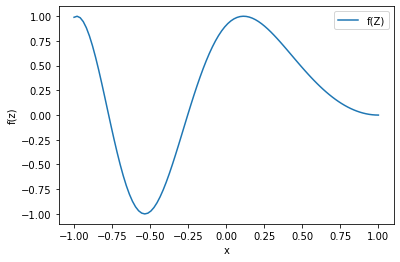

In [145]:
plt.plot(X, Y, label = 'f(Z)')
plt.legend()
plt.ylabel('f(z)')
plt.xlabel('x')
plt.show()

Recall that gCP is $$f(Z) \approx f_N(Z) = \sum^{N}_{n=0} \hat{f_n}\psi_{n}(Z)$$

where $\hat{f_n},$
is approximated by quadrature and $\psi_{n}$ is approximated by orthognal poly

In [146]:
# function to approximate:  f(z) = sin(2(Z-1)**2);
# N+1 Legendre polynomials used for projection, highest degree is N
N=7

In [147]:
# numerical approximation of inner products c_i=(p_i, f) and normalization
# constants g_i=(p_i, p_i) using Gauss-Legendre quadrature for numerical 
# integration
# (here, p_i is the i-th Legendre polynomial, with i=0,1,..,N)

In [148]:
M=N+1

In [149]:
x, w = np.polynomial.legendre.leggauss(M)
print(x)
print(w)

[-0.96028986 -0.79666648 -0.52553241 -0.18343464  0.18343464  0.52553241
  0.79666648  0.96028986]
[0.10122854 0.22238103 0.31370665 0.36268378 0.36268378 0.31370665
 0.22238103 0.10122854]


In [150]:
fx=f(x)

In [151]:
c=np.zeros(N+1); g=np.zeros(N+1);

In [152]:

for i in range(1,N+1):

    # evaluate polynomial
    px = legendre(i - 1)(x)
    

    # approximate inner product at (p_i, f)
    c[i] = np.dot(px * fx, w)
    
    
    # approximate inner product at (p_i, p_i)
    g[i] = np.dot(px*px, w)
    
    # recall that f_hat = <poly, function>/<poly, poly>



In [168]:
# computational grid
l =-1
r=1
dz=0.001;

z=np.linspace(l,r,int((r-l) / dz));
J=len(z)-1;
p=np.zeros((N+1,J+1)); 



[0. 0. 0. ... 0. 0. 0.]


In [170]:
# evaluate polynomials on computational grid:
for i in range(1,N+1):
    p[i,:]=legendre(i-1)(z)



In [155]:
# real func
f_real = f(z)
# approximation of function using orthogonal polynomials
# recall that: f = sum(f_hat_i * poly_i)
fa = np.zeros(len(f_real))
for i in range(1,N):
    fa = fa+(c[i]/g[i])*p[i,:]



[1.71872419 1.70584751 1.69300977 ... 0.35576747 0.3620689  0.36842235]


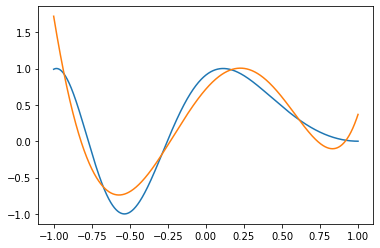

In [156]:
plt.plot(z,f_real)
plt.plot(z,fa)

Compute the mean and varianceo of f(Z) using MC sampling. Compute mean and variance of the approximation $f_{N=7}(Z)$ from the expansion coefficient. Plot the distributions by generating many samples

In [157]:
random_sample = np.random.uniform(-1, 1, 100000)
monte_carlo_f = f(random_sample)

In [158]:
J=len(random_sample)-1
p=np.zeros((N+1,J+1)) 

In [159]:
# evaluate polynomials on computational grid:
for i in range(1,N+1):
    p[i,:]=legendre(i-1)(random_sample)

In [160]:
# real func
f_real = f(random_sample)
# approximation of function using orthogonal polynomials
# recall that: f = sum(f_hat_i * poly_i)
monte_carlo_f_a = np.zeros(len(f_real))
for i in range(1,N+1):
    monte_carlo_f_a = monte_carlo_f_a+(c[i]/g[i])*p[i,:]

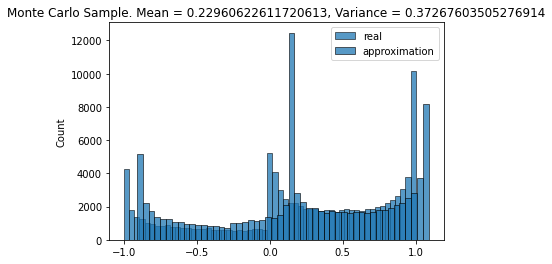

In [161]:
sns.histplot(monte_carlo_f, label='real')
sns.histplot(monte_carlo_f_a, label='approximation')
plt.title(f'Monte Carlo Sample. Mean = {np.mean(monte_carlo_f)}, Variance = {np.var(monte_carlo_f)}')
plt.legend()
plt.show()

In [162]:
# mean
c[1]/g[1]

0.2268649971051089

In [163]:
# numerical solution in 1D
i=3

f_gamma = lambda x, i, j:legendre(i-1)(x)* legendre(j-1)(x) 

In [164]:
gammas = np.zeros((N+1, N+1))

for n in range(1,N+1):
    for m in range(1,N+1):
        gammas[n, m] = integrate.quadrature(f_gamma, -1,1, args=(n, m))[0]

In [165]:
np.diag(gammas)

array([0.        , 2.        , 0.66666667, 0.4       , 0.28571429,
       0.22222222, 0.18181818, 0.15384615])

In [166]:
var = 0
for i in range(1,N+1):
    var+=(c[i]/g[i])**2 * gammas[i,i]